# Scipy.weave 

Wrapping a function from CGAL

- some linker options configured for a local install of miniconda
- assumes that CGAL is installed

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.weave
import numpy as np
import os

In [25]:
def minkowski_sum(p, q):
    out = []
    code = '''
    struct Kernel : public CGAL::Exact_predicates_exact_constructions_kernel {};
    typedef Kernel::Point_2                               Point_2;
    typedef CGAL::Polygon_2<Kernel>                       Polygon_2;
    typedef CGAL::Polygon_with_holes_2<Kernel>            Polygon_with_holes_2;
    Polygon_2 P;
    Polygon_2 Q;
    for(int i = 0; i < Np[0]; i++)
    {
        P.push_back(Point_2(P2(i,0), P2(i,1)));
    }
    for(int i = 0; i < Nq[0]; i++)
    {
        Q.push_back(Point_2(Q2(i,0), Q2(i,1)));
    }
    Polygon_with_holes_2  sum = minkowski_sum_2(P, Q);
    auto ob = sum.outer_boundary();
    for(int i = 0; i < ob.size(); i++)
    {
        Point_2 pt = ob.vertex(i);
        py::list t(2);
        t[0] = py::object( CGAL::to_double(pt.x()) );
        t[1] = py::object( CGAL::to_double(pt.y()) );
        out.append( t );
    }
    '''
    incpath = [
        os.path.expanduser('~/miniconda')
    ]
    libpath = os.path.expanduser('~/miniconda/lib')ß
    scipy.weave.inline(code = code, 
                       verbose=2,
                       arg_names = ['p', 'q', 'out'],
                       extra_compile_args = [
                            '-fcolor-diagnostics', 
                            '-std=c++11'
                            
                       ],
                       extra_link_args = [
                            '-rpath ' + libpath
                       ],
                       headers = [
                            '<CGAL/Exact_predicates_exact_constructions_kernel.h>',
                            '<CGAL/Cartesian.h>',
                            '<CGAL/minkowski_sum_2.h>',
                       ],
                       libraries = ['CGAL'],
                       include_dirs = incpath)
    return np.array(out)

p = np.array([
        [0.0, 0.0],
        [1.0, 0.0],
        [1.0, 1.0],
        [0.0, 1.0],
    ])
q = np.array([
        [-0.5, 0.0],
        [ 0.5, 0.0],
        [ 0.0, 1.0],
    ])



/Users/walkera/miniconda/lib


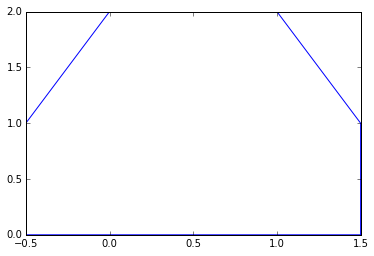

In [29]:
out = minkowski_sum(p, q)
plt.plot(out[:,0], out[:,1])